### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Dataset

In [2]:
client = pd.read_csv("clean_data_after_eda.csv")

In [3]:
client.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_off_peak_var,var_6m_price_peak_var,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000131,4.100838e-05,9.084737e-04,2.086294,99.530517,44.235794,2.086425,9.953056e+01,4.423670e+01,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000003,1.217891e-03,0.000000e+00,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000e+00,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000004,9.450150e-08,0.000000e+00,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000e+00,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000003,0.000000e+00,0.000000e+00,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.000011,2.896760e-06,4.860000e-10,0.000000,0.000000,0.000000,0.000011,2.896760e-06,4.860000e-10,0


### Exploring Dataset

In [4]:
client.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
var_year_price_off_peak_var       0
var_year_price_peak_var           0
var_year_price_mid_peak_var 

In [5]:
client.dtypes

id                                 object
channel_sales                      object
cons_12m                            int64
cons_gas_12m                        int64
cons_last_month                     int64
date_activ                         object
date_end                           object
date_modif_prod                    object
date_renewal                       object
forecast_cons_12m                 float64
forecast_cons_year                  int64
forecast_discount_energy          float64
forecast_meter_rent_12m           float64
forecast_price_energy_off_peak    float64
forecast_price_energy_peak        float64
forecast_price_pow_off_peak       float64
has_gas                            object
imp_cons                          float64
margin_gross_pow_ele              float64
margin_net_pow_ele                float64
nb_prod_act                         int64
net_margin                        float64
num_years_antig                     int64
origin_up                         

### Converting columns into datatime format

In [6]:
client["date_activ"] = pd.to_datetime(client["date_activ"], format='%Y-%m-%d')
client["date_end"] = pd.to_datetime(client["date_end"], format='%Y-%m-%d')
client["date_modif_prod"] = pd.to_datetime(client["date_modif_prod"], format='%Y-%m-%d')
client["date_renewal"] = pd.to_datetime(client["date_renewal"], format='%Y-%m-%d')

In [7]:
price_df = pd.read_csv('price_data (1).csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


### Difference between off-peak prices in December and preceding January

In [8]:
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [9]:
data=pd.merge(client,diff,on='id')

In [10]:
data.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_mid_peak_var,var_6m_price_off_peak_fix,var_6m_price_peak_fix,var_6m_price_mid_peak_fix,var_6m_price_off_peak,var_6m_price_peak,var_6m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.000908,2.086294,99.530517,44.235794,2.086425,9.953056e+01,44.236702,1,0.020057,3.700961
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,0.009482,0.000000,0.000000,0.009485,1.217891e-03,0.000000,0,-0.003767,0.177779
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,0.000000,0.000000,0.000000,0.000004,9.450150e-08,0.000000,0,-0.004670,0.177779


### Average price changes across periods

In [11]:
df=price_df.groupby(by='id').agg({
'price_off_peak_var':'mean',
'price_peak_var':'mean',
'price_mid_peak_var':'mean',
'price_off_peak_fix':'mean',
'price_peak_fix':'mean',
'price_mid_peak_fix':'mean'}).reset_index()

In [12]:
df['diff_period1_period2_energy']=df['price_off_peak_var']-df['price_peak_var']
df['diff_period2_period3_energy']=df['price_off_peak_var']-df['price_mid_peak_var']
df['diff_period1_period3_energy']=df['price_peak_var']-df['price_mid_peak_var']
df['diff_period1_period2_power']=df['price_off_peak_fix']-df['price_peak_fix']
df['diff_period2_period3_power']=df['price_peak_fix']-df['price_mid_peak_fix']
df['diff_period1_period3_power']=df['price_off_peak_fix']-df['price_mid_peak_fix']

In [13]:
df.drop(columns=['price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix'],inplace=True)

In [14]:
data=pd.merge(data,df,on='id')

In [15]:
data.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,var_6m_price_mid_peak,churn,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,diff_period1_period2_energy,diff_period2_period3_energy,diff_period1_period3_energy,diff_period1_period2_power,diff_period2_period3_power,diff_period1_period3_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,44.236702,1,0.020057,3.700961,0.024038,0.058257,0.034219,18.590255,7.45067,26.040925
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,0,-0.003767,0.177779,0.142485,0.149609,0.007124,44.311375,0.00000,44.311375
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.000000,0,-0.004670,0.177779,0.082090,0.170512,0.088421,44.385450,0.00000,44.385450


### Max price changes across periods and months

In [16]:
df=df.groupby(by='id').agg({
'diff_period1_period2_energy':'max',
'diff_period2_period3_energy':'max',
'diff_period1_period3_energy':'max',
'diff_period1_period2_power':'max',
'diff_period2_period3_power':'max',
'diff_period1_period3_power':'max'
}).reset_index().rename(columns={
'diff_period1_period2_energy':'MAX_diff_period1_period2_energy',
'diff_period2_period3_energy':'MAX_diff_period2_period3_energy',
'diff_period1_period3_energy':'MAX_diff_period1_period3_energy',
'diff_period1_period2_power':'MAX_diff_period1_period2_power',
'diff_period2_period3_power':'MAX_diff_period2_period3_power',
'diff_period1_period3_power':'MAX_diff_period1_period3_power'
})

In [17]:
data=pd.merge(data,df,on='id')

In [18]:
data.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,diff_period1_period3_energy,diff_period1_period2_power,diff_period2_period3_power,diff_period1_period3_power,MAX_diff_period1_period2_energy,MAX_diff_period2_period3_energy,MAX_diff_period1_period3_energy,MAX_diff_period1_period2_power,MAX_diff_period2_period3_power,MAX_diff_period1_period3_power
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.034219,18.590255,7.45067,26.040925,0.024038,0.058257,0.034219,18.590255,7.45067,26.040925
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.007124,44.311375,0.00000,44.311375,0.142485,0.149609,0.007124,44.311375,0.00000,44.311375
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.088421,44.385450,0.00000,44.385450,0.082090,0.170512,0.088421,44.385450,0.00000,44.385450


### Separating Numeric, DateTime and Categorical column

In [19]:
num=[]
cat=[]
datetime=[]
for i in data.columns:
    if data[i].dtypes=='object':
        cat.append(i)
    elif data[i].dtypes=='datetime64[ns]':
        datetime.append(i)
    else:
        num.append(i)

In [20]:
data[cat].nunique()

id               14606
channel_sales        8
has_gas              2
origin_up            6
dtype: int64

### Label Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
de=pd.DataFrame(le.fit_transform(data['channel_sales']),columns=['channel'])
de['origin']=pd.DataFrame(le.fit_transform(data['origin_up']))
de['id']=data['id']

In [23]:
y=pd.get_dummies(data['has_gas']).astype(int)

In [24]:
y.drop(['t'],axis=1,inplace=True)

In [25]:
y.rename(columns={'f':'has gas'},inplace=True)

In [26]:
de=pd.concat([de,y],axis=1)

In [27]:
de.head(2)

,channel,origin,id,has gas
0,4,4,24011ae4ebbe3035111d65fa7c15bc57,0
1,0,2,d29c2c54acc38ff3c0614d0a653813dd,1


In [28]:
data=pd.merge(data,de,on='id')

### One Hot Encoding

In [29]:
data.drop(['channel_sales', 'has_gas', 'origin_up'],axis=1,inplace=True)

In [30]:
data.head(2)

,id,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,...,diff_period1_period3_power,MAX_diff_period1_period2_energy,MAX_diff_period2_period3_energy,MAX_diff_period1_period3_energy,MAX_diff_period1_period2_power,MAX_diff_period2_period3_power,MAX_diff_period1_period3_power,channel,origin,has gas
0,24011ae4ebbe3035111d65fa7c15bc57,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,...,26.040925,0.024038,0.058257,0.034219,18.590255,7.45067,26.040925,4,4,0
1,d29c2c54acc38ff3c0614d0a653813dd,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,...,44.311375,0.142485,0.149609,0.007124,44.311375,0.00000,44.311375,0,2,1


### Tenure

In [31]:
data['tenure'] = ((data['date_end'] - data['date_activ']).dt.days / 365).astype(int)

In [32]:
data.groupby(['tenure']).agg({'churn': 'mean'}).sort_values(by='churn', ascending=False)

,churn
tenure,
2,0.176471
3,0.143874
4,0.127473
13,0.095238
5,0.091999
12,0.083333
7,0.075472
6,0.075407
11,0.059783


### Extracting Month from Date and Time

In [34]:
data['month_activ']=data['date_activ'].dt.month
data['month_end']=data['date_end'].dt.month
data['month_modif_prod']=data['date_modif_prod'].dt.month
data['month_renewal']=data['date_renewal'].dt.month

In [36]:
data.drop(columns=['date_activ','date_end','date_modif_prod','date_renewal'],inplace=True)

### Transforming Data

In [39]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]

data[skewed].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378


In [40]:
data["cons_12m"] = np.log10(data["cons_12m"] + 1)
data["cons_gas_12m"] = np.log10(data["cons_gas_12m"] + 1)
data["cons_last_month"] = np.log10(data["cons_last_month"] + 1)
data["forecast_cons_12m"] = np.log10(data["forecast_cons_12m"] + 1)
data["forecast_cons_year"] = np.log10(data["forecast_cons_year"] + 1)
data["forecast_meter_rent_12m"] = np.log10(data["forecast_meter_rent_12m"] + 1)
data["imp_cons"] = np.log10(data["imp_cons"] + 1)

In [41]:
data[skewed].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,4.223939,0.779244,2.264646,2.962177,1.784610,0.966726,1.517203,0.137283,0.050491,43.130056
std,0.884515,1.717071,1.769305,0.683592,1.584986,5.108289,0.571481,0.024623,0.049037,4.485988
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.754023,0.000000,0.000000,2.695477,0.000000,0.000000,1.235023,0.116340,0.000000,40.606701
50%,4.149727,0.000000,2.899547,3.046836,2.498311,0.000000,1.296555,0.143166,0.084138,44.311378
75%,4.610285,0.000000,3.529430,3.380716,3.242231,0.000000,2.120673,0.146348,0.098837,44.311378
max,6.792889,6.618528,5.887169,4.918575,5.243970,30.000000,2.778376,0.273963,0.195975,59.266378


### Visualization

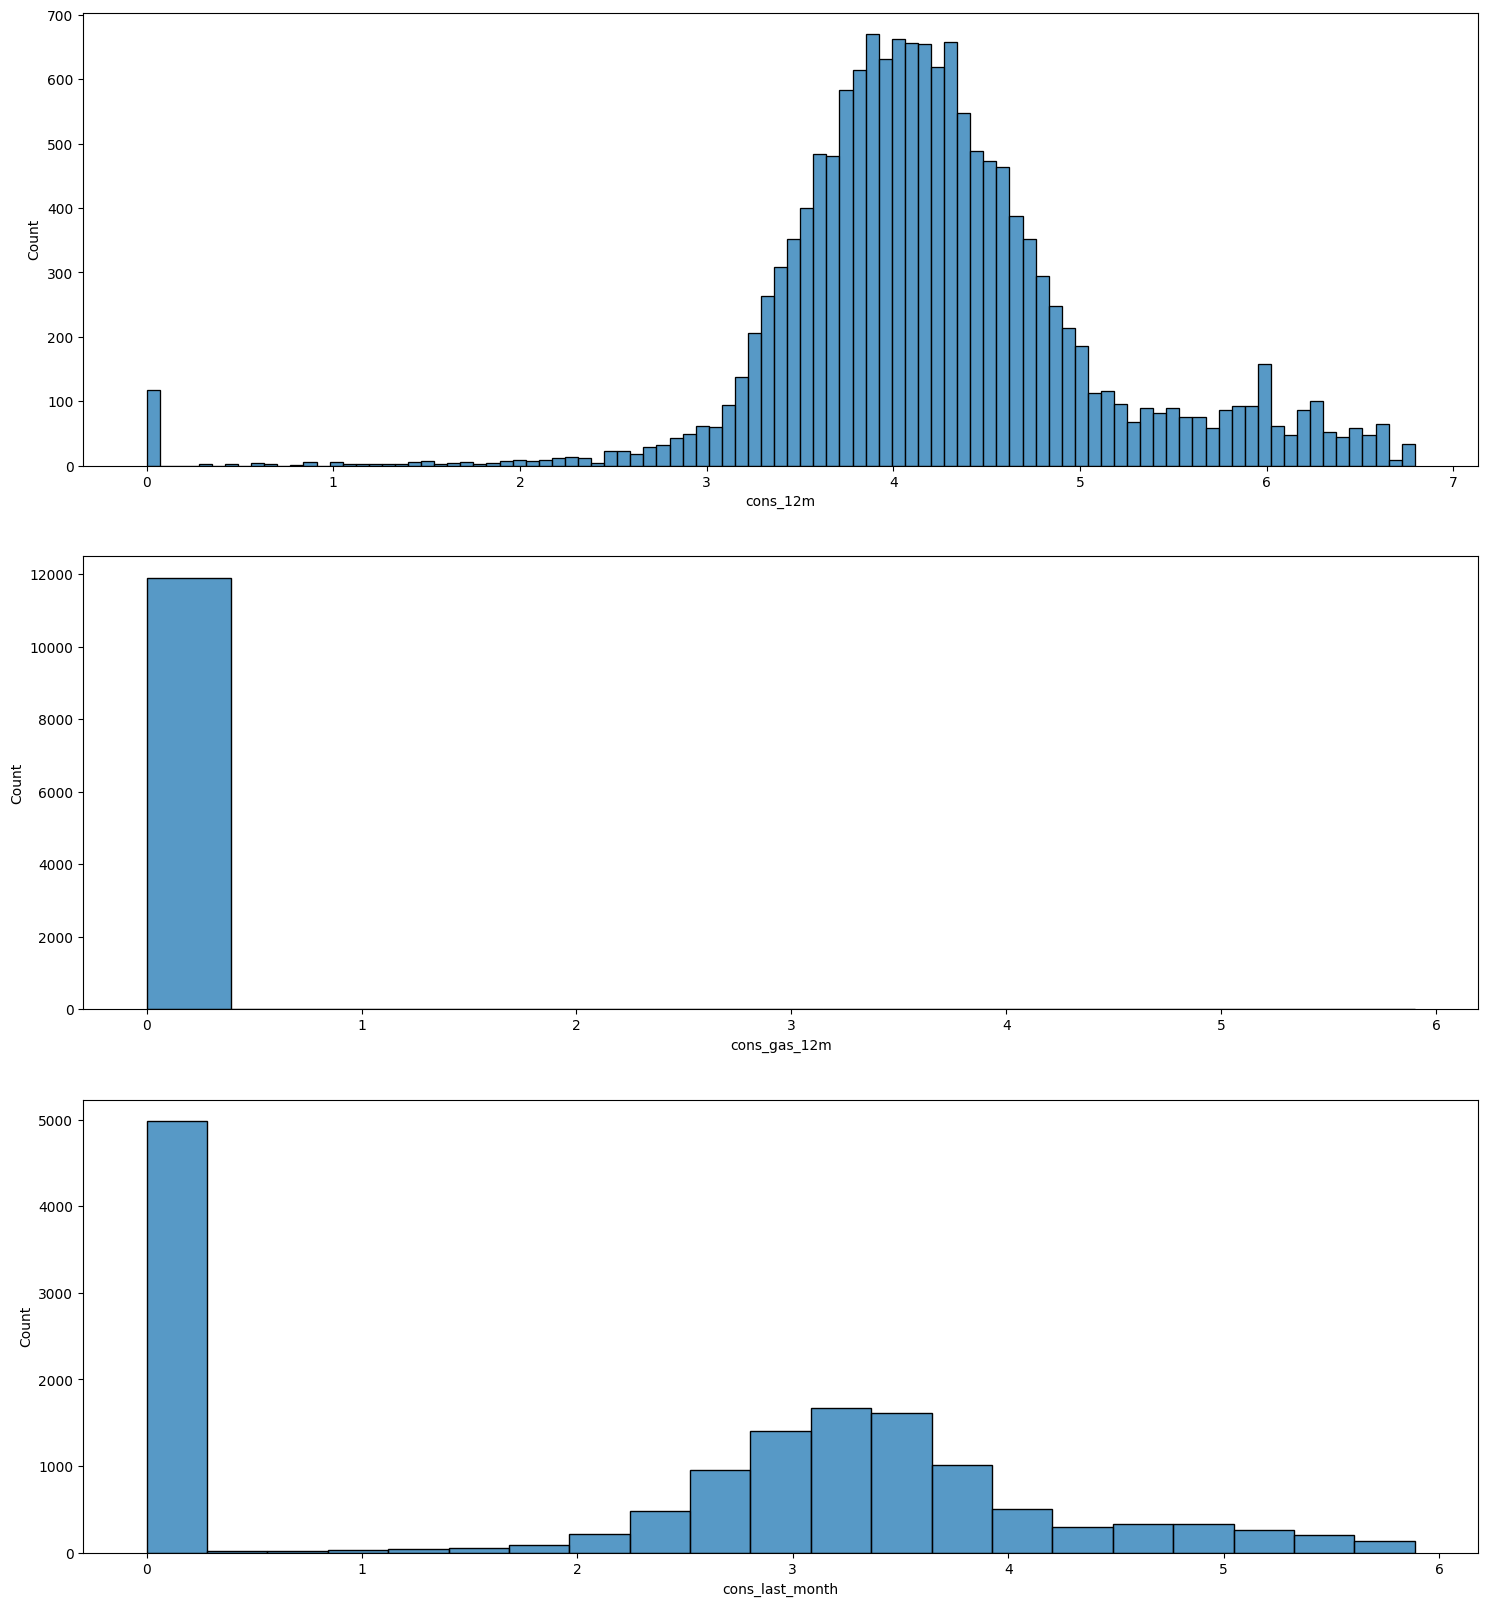

In [44]:
fig, axs = plt.subplots(nrows=3, figsize=(18, 20))
sns.histplot((data["cons_12m"].dropna()), ax=axs[0])
sns.histplot((data[data["has gas"]==1]["cons_gas_12m"].dropna()), ax=axs[1])
sns.histplot((data["cons_last_month"].dropna()), ax=axs[2])
plt.show()

In [46]:
num=[]
cat=[]
datetime=[]
for i in data.columns:
    if data[i].dtypes=='object':
        cat.append(i)
    elif data[i].dtypes=='datetime64[ns]':
        datetime.append(i)
    else:
        num.append(i)

### Correlation

In [47]:
correlation = data[num].corr()

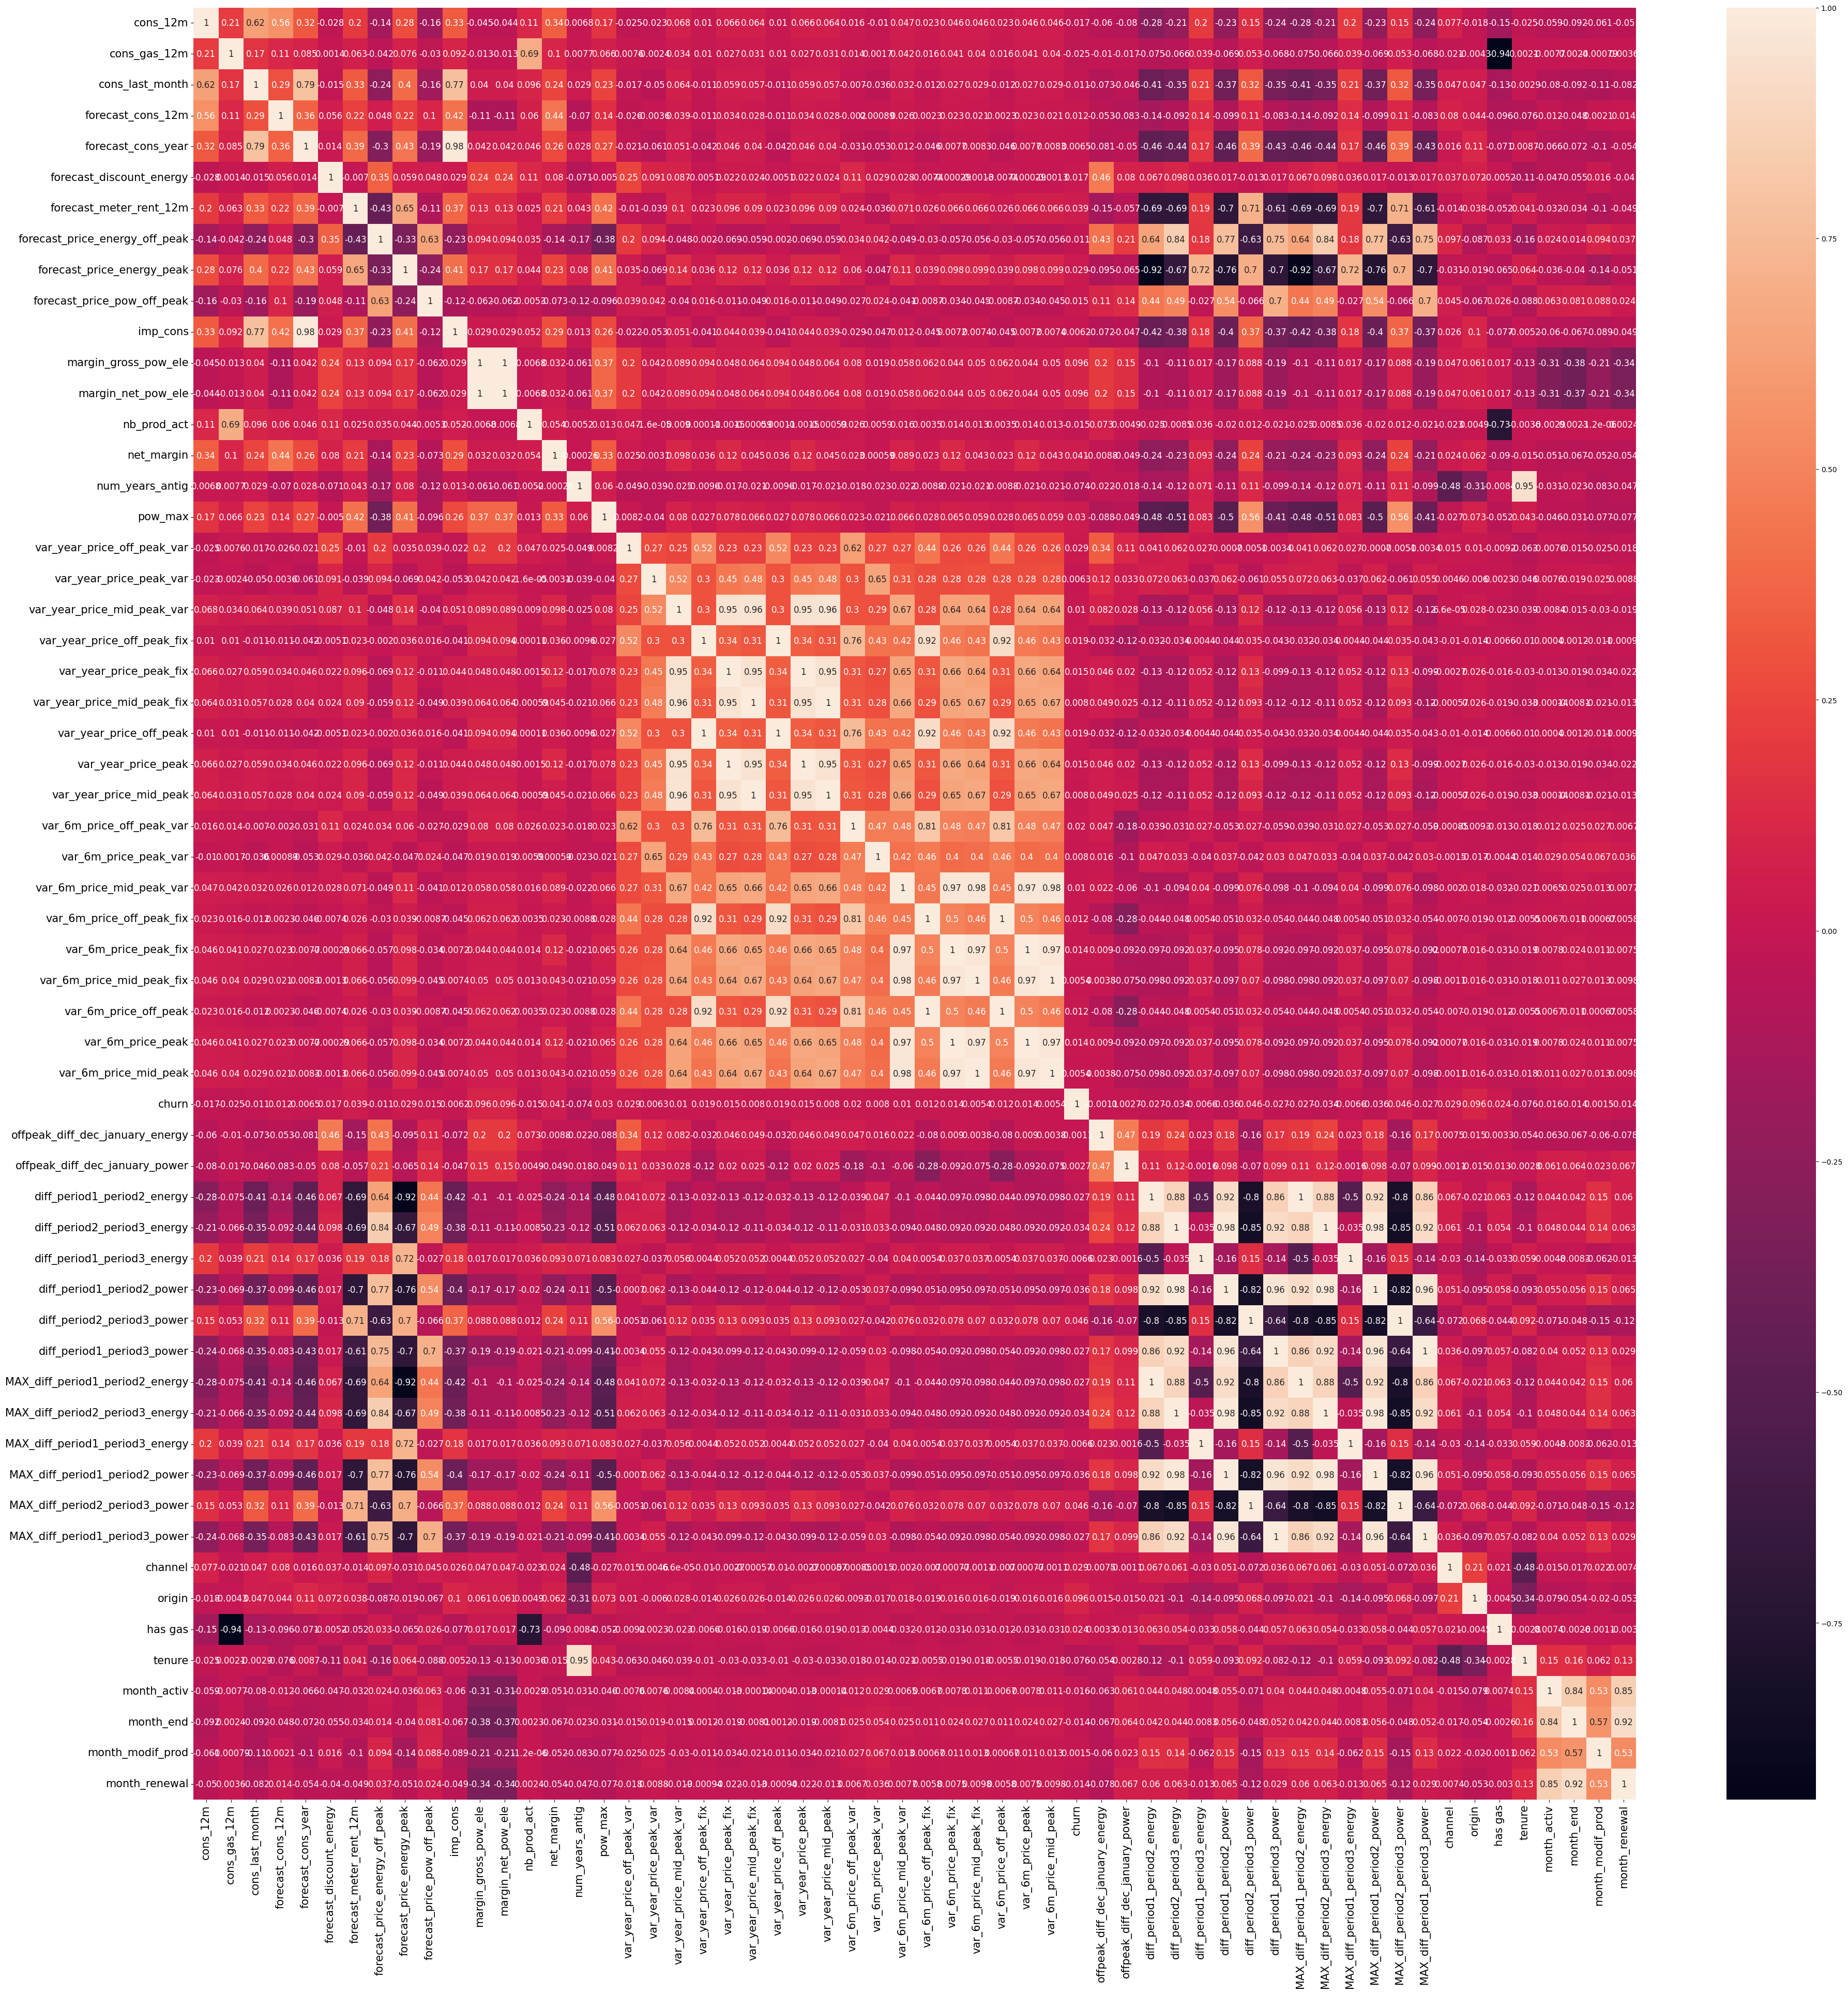

In [50]:
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [51]:
data = data.drop(columns=['num_years_antig', 'forecast_cons_year'])
data.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,MAX_diff_period2_period3_power,MAX_diff_period1_period3_power,channel,origin,has gas,tenure,month_activ,month_end,month_modif_prod,month_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,7.450670,26.040925,4,4,0,3,6,6,11,6
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,0.000000,44.311375,0,2,1,7,8,8,8,8
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,0.000000,44.385450,4,2,1,6,4,4,4,4
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,0.000000,44.400265,5,2,1,6,3,3,3,3
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,8.137629,24.412893,0,2,1,6,1,3,1,3
